# Análises Exploratória dos dados de treino

## Setup e imports

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
%cd /content/drive/Shareddrives/ProjetoAM/music-inRecomendation/

/content/drive/Shareddrives/ProjetoAM/music-inRecomendation


In [5]:
df=pd.read_csv('data/dados_treino.csv')

In [6]:
df.head()

,bateria,Tem_Instr_Violao_Viola,Tem_Instr_Guitarra,Tem_Instr_Cavaco,Tem_Instr_Sintetizador_Teclado,Tem_Instr_Piano,Tem_Instr_Metais,Tem_Instr_Madeiras,Tem_Instr_Cordas,BPM,VolMedio,PctCantada,PctRap,duracao,ano_lancamento,aovivo,modo,explicita,gostou,n_reproducao,id_cliente
0,Eletrônica,True,True,False,True,True,False,False,True,110.275495,-6.322162,72.909014,16.308793,233021,2004,False,A#,True,True,2,#ID7758
1,Acústica,False,True,False,True,False,False,False,False,117.367073,-6.509007,72.654133,0.000000,166437,1999,False,E,True,True,8,#ID7758
2,Acústica,True,False,True,False,False,False,False,False,100.134208,-12.717853,74.129557,0.000000,159426,2002,False,c,False,False,5,#ID7758
3,Eletrônica,True,False,False,True,True,False,False,True,105.056053,-8.088894,78.123907,18.818652,244636,1991,False,g,False,False,2,#ID7758
4,Acústica,False,False,True,True,False,False,False,False,95.707941,-7.564842,74.159074,0.000000,166520,2018,False,d#,False,True,7,#ID7758


## Data cleaning

Para cada uma das colunas verificar dados inconsistêntes

*e.g* 
* Tempo negativo
* % > 100


In [7]:
print(len(df))


4926


In [8]:
print(len(df))
df.query('duracao >0', inplace=True)


4926


In [9]:
print(len(df))
df.query('PctCantada <= 100 & PctCantada>=0',inplace=True)


4922


In [10]:
print(len(df))
df.query('PctRap <= 100 & PctRap>=0',inplace=True)
print(len(df))


4922
4921


In [11]:
len(df[df.modo.isna()])

438

Temos uma quantidade consideravel de musicas sem um modo definido (438).

In [12]:
df[df.modo.isna()].agg({'unique'}).loc[:,'bateria':'Tem_Instr_Cordas']

,bateria,Tem_Instr_Violao_Viola,Tem_Instr_Guitarra,Tem_Instr_Cavaco,Tem_Instr_Sintetizador_Teclado,Tem_Instr_Piano,Tem_Instr_Metais,Tem_Instr_Madeiras,Tem_Instr_Cordas
unique,"[Acústica, Eletrônica, Nenhuma]","[False, True]","[True, False]","[False, True]","[False, True]","[True, False]","[True, False]","[True, False]","[False, True]"


Percebemos que são músicas que podem possuir  todos instrumentos, inclusive os harmonicos e melódicos, o que indica que a ausencia de uma tonalidade é realmente um dado faltante.

In [13]:
print('Músicas por cliente')
display(df.id_cliente.value_counts().to_frame())
print('Músicas por cliente (sem a tonalidade)')
display(df[df.modo.isna()].id_cliente.value_counts().to_frame())

Músicas por cliente


,id_cliente
#ID7758,2473
#ID4820,2448


Músicas por cliente (sem a tonalidade)


,id_cliente
#ID4820,231
#ID7758,207


Como podemos notar, por volta de 10% das músicas para cada cliente não possuem uma tonalidade indicada, o que pode ser considerada uma perda razoável de informação.

In [14]:
df.agg({'unique'})

,bateria,Tem_Instr_Violao_Viola,Tem_Instr_Guitarra,Tem_Instr_Cavaco,Tem_Instr_Sintetizador_Teclado,Tem_Instr_Piano,Tem_Instr_Metais,Tem_Instr_Madeiras,Tem_Instr_Cordas,BPM,VolMedio,PctCantada,PctRap,duracao,ano_lancamento,aovivo,modo,explicita,gostou,n_reproducao,id_cliente
unique,"[Eletrônica, Acústica, Nenhuma]","[True, False]","[True, False]","[False, True]","[True, False]","[True, False]","[False, True]","[False, True]","[True, False]","[110.275495473565, 117.367073297504, 100.13420...","[-6.3221624510694, -6.50900651603091, -12.7178...","[72.90901423020841, 72.6541325899253, 74.12955...","[16.308793195307, 0.0, 18.8186518137422, 62.53...","[233021, 166437, 159426, 244636, 166520, 18398...","[2004, 1999, 2002, 1991, 2018, 2016, 2001, 201...","[False, True]","[A#, E, c, g, d#, C#, a, f#, C, nan, d, f, F#,...","[True, False]","[True, False]","[2, 8, 5, 7, 3, 4, 6, 1, 9, 10, 11]","[#ID7758, #ID4820]"


In [15]:
df.groupby('id_cliente')['gostou'].value_counts()

id_cliente  gostou
#ID4820     False     1882
            True       566
#ID7758     False     1612
            True       861
Name: gostou, dtype: int64

In [16]:
cliente1 = df[df.id_cliente=="#ID7758"]
cliente2 = df[df.id_cliente=="#ID4820"]

In [17]:
df.isna().any()

bateria                           False
Tem_Instr_Violao_Viola            False
Tem_Instr_Guitarra                False
Tem_Instr_Cavaco                  False
Tem_Instr_Sintetizador_Teclado    False
Tem_Instr_Piano                   False
Tem_Instr_Metais                  False
Tem_Instr_Madeiras                False
Tem_Instr_Cordas                  False
BPM                               False
VolMedio                          False
PctCantada                        False
PctRap                            False
duracao                           False
ano_lancamento                    False
aovivo                            False
modo                               True
explicita                         False
gostou                            False
n_reproducao                      False
id_cliente                        False
dtype: bool

In [18]:
df.VolMedio.describe()

count    4921.000000
mean       -8.282737
std         2.988159
min       -35.309181
25%        -9.162239
50%        -7.552958
75%        -6.490424
max         1.329307
Name: VolMedio, dtype: float64

In [19]:
df.modo.value_counts(dropna=False)

NaN    438
C      350
F      334
c      260
G      259
a      233
d      227
g      222
D      207
b      203
A#     194
f      188
e      187
A      178
G#     178
E      173
D#     172
d#     161
C#     132
c#     131
B      122
a#     120
f#      88
F#      82
g#      82
Name: modo, dtype: int64

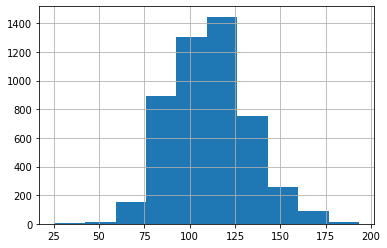

In [20]:
df.VolMedio.hist()

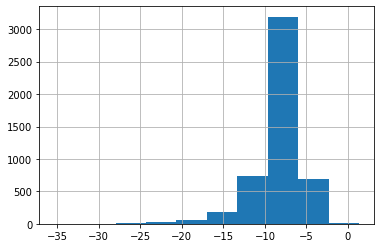

In [21]:
df.VolMedio.hist()

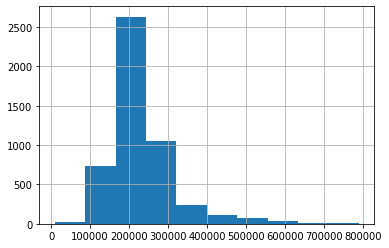

In [22]:
df.duracao.hist()

In [23]:
df.duracao.describe()

count      4921.000000
mean     230660.930502
std       84536.410049
min        9297.000000
25%      179673.000000
50%      211835.000000
75%      256780.000000
max      789083.000000
Name: duracao, dtype: float64

É interessante notar que os `modos` estão apresentados através das letras **maiusculas** representando **tonalidades maiores** e **minusculas** representando **tonalidades menores**

In [24]:
modos_counts=df.modo.value_counts(dropna=False).reset_index().rename(columns={'index':'tonalidade','modo':'contagem'})

In [25]:
modos_counts.fillna("N_spec", inplace=True)

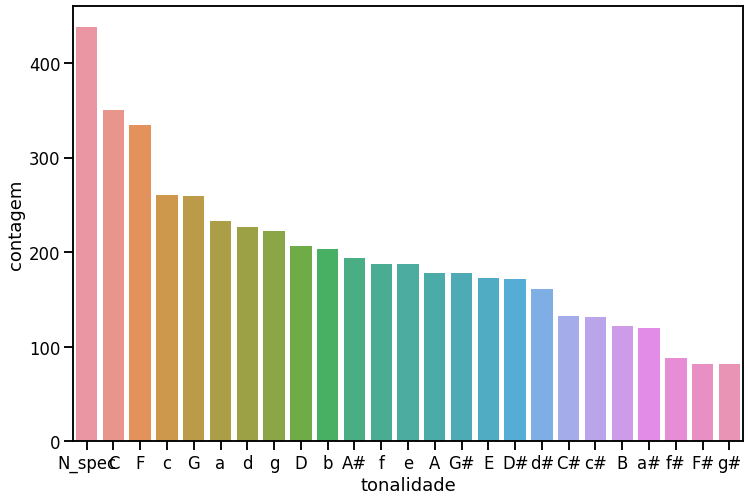

In [26]:
plt.figure(figsize=(12,8))
sns.set_context('talk')
ax=sns.barplot(x="tonalidade",y="contagem", data=modos_counts)

In [27]:
df['tom_menor']=df.modo.str.islower()

In [28]:
def tom(df):
  if df.tom_menor == True:
    return 'menor'
  else:
    return 'maior'
df['tom']=df.apply(tom, axis=1)

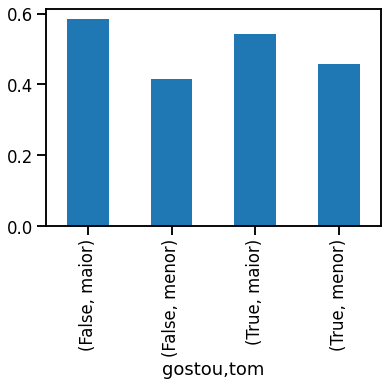

In [29]:
df.groupby('gostou')['tom'].value_counts(normalize=True).plot(kind='bar')

(ln(df.VolMedio+ 36) * df.BPM)

In [75]:
df['Energia']=((df.VolMedio+ 36) * df.BPM)

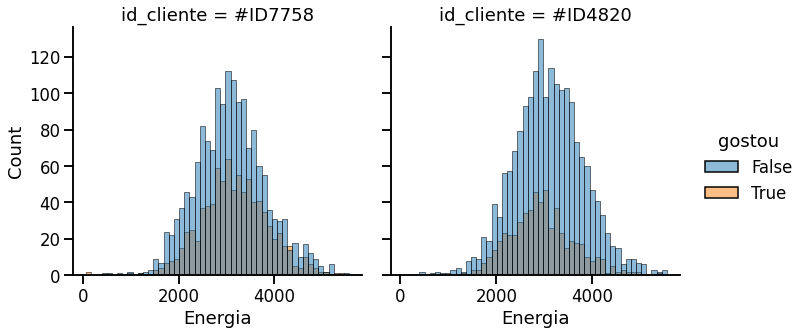

In [95]:
sns.displot(data=df, x="Energia",  hue="gostou", col="id_cliente")

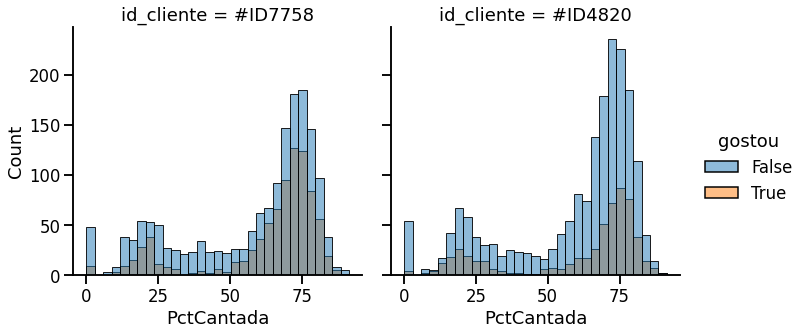

In [92]:
sns.displot(data=df, x="PctCantada", hue="gostou", col="id_cliente")

<Figure size 864x576 with 0 Axes>

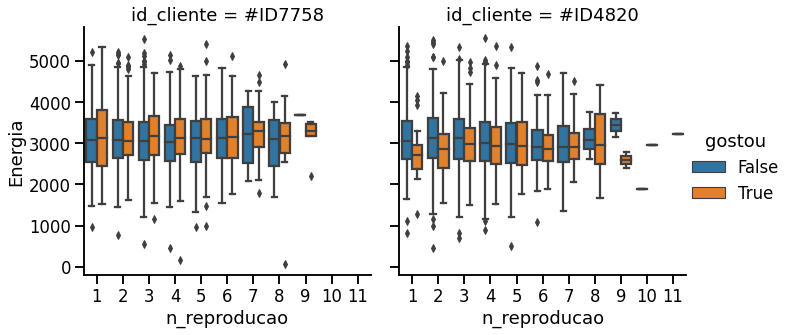

In [99]:
plt.figure(figsize=(12,8))
sns.set_context('talk')
sns.catplot(data=df, y="Energia",x="n_reproducao", hue="gostou",col="id_cliente",
            kind="box")

<Figure size 864x576 with 0 Axes>

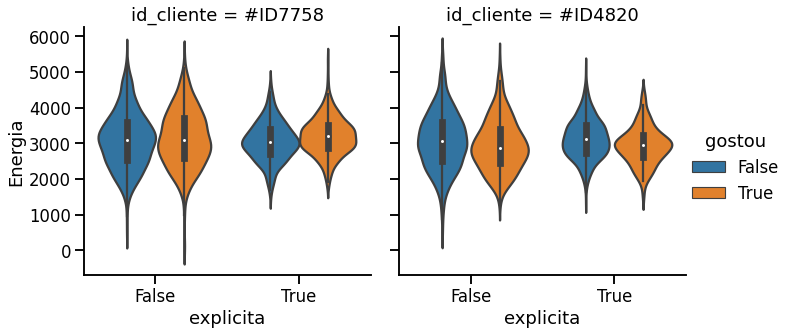

In [106]:
plt.figure(figsize=(12,8))

sns.catplot(data=df, y="Energia",x="explicita", hue="gostou",col="id_cliente",
            kind="violin")

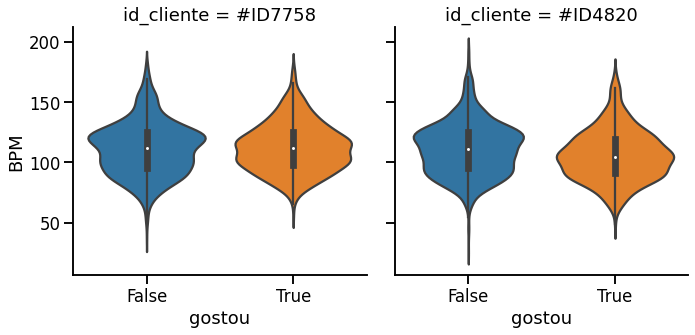

In [105]:
sns.catplot(data=df, y="BPM",x="gostou",col="id_cliente",
            kind="violin")

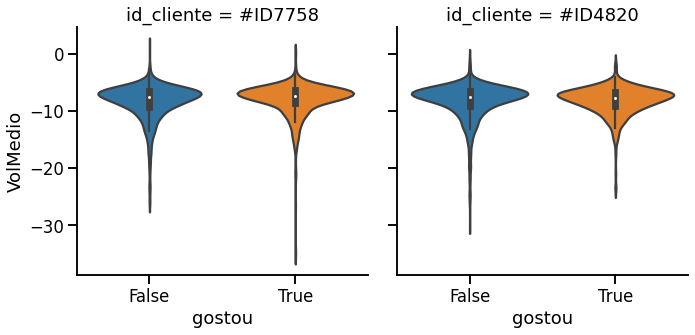

In [104]:
sns.catplot(data=df, y="VolMedio",x="gostou",col="id_cliente",
            kind="violin")

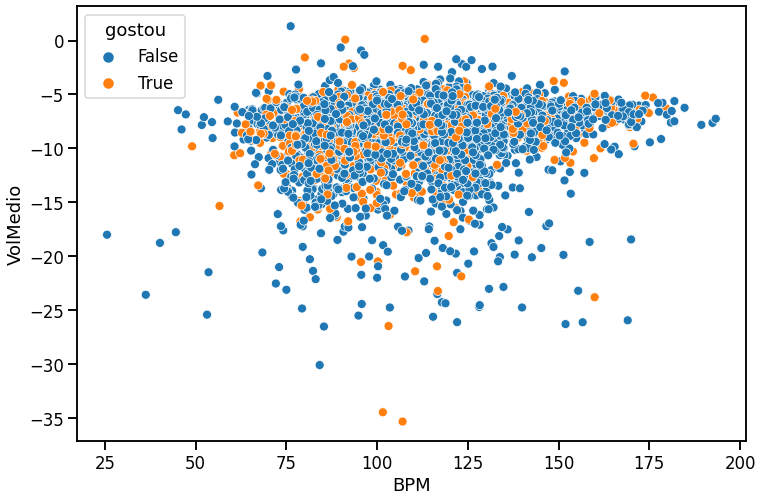

In [109]:
plt.figure(figsize=(12,8))

sns.scatterplot(data=df, y="VolMedio",x="BPM", hue="gostou")

In [121]:
df['gostou_str']= df.gostou.astype(str)
df['explicita_str']= df.explicita.astype(str)

In [117]:
import plotly.express as px

fig = px.scatter_3d(df, x='VolMedio', y='BPM', z='PctCantada',color='gostou_str')
fig.show()

In [126]:
fig = px.scatter_3d(df, x='PctCantada', y='Energia', z='PctRap',color='gostou_str')
fig.show()

### t-SNE

In [133]:
from sklearn.preprocessing import LabelEncoder  
from sklearn.manifold import TSNE
le = LabelEncoder()


In [162]:
df.head()

,bateria,Tem_Instr_Violao_Viola,Tem_Instr_Guitarra,Tem_Instr_Cavaco,Tem_Instr_Sintetizador_Teclado,Tem_Instr_Piano,Tem_Instr_Metais,Tem_Instr_Madeiras,Tem_Instr_Cordas,BPM,VolMedio,PctCantada,PctRap,duracao,ano_lancamento,aovivo,modo,explicita,gostou,n_reproducao,id_cliente,tom_menor,tom,Energia,gostou_str,explicita_str
0,Eletrônica,True,True,False,True,True,False,False,True,110.275495,-6.322162,72.909014,16.308793,233021,2004,False,A#,True,True,2,#ID7758,False,maior,3272.738240,True,True
1,Acústica,False,True,False,True,False,False,False,False,117.367073,-6.509007,72.654133,0.000000,166437,1999,False,E,True,True,8,#ID7758,False,maior,3461.271594,True,True
2,Acústica,True,False,True,False,False,False,False,False,100.134208,-12.717853,74.129557,0.000000,159426,2002,False,c,False,False,5,#ID7758,True,menor,2331.339332,False,False
3,Eletrônica,True,False,False,True,True,False,False,True,105.056053,-8.088894,78.123907,18.818652,244636,1991,False,g,False,False,2,#ID7758,True,menor,2932.230665,False,False
4,Acústica,False,False,True,True,False,False,False,False,95.707941,-7.564842,74.159074,0.000000,166520,2018,False,d#,False,True,7,#ID7758,True,menor,2721.470415,True,False


In [164]:
#df_x= df.drop(columns=['gostou', 'gostou_str', 'explicita_str', 'id_cliente', 'tom'])
df_x=df.loc[:,'bateria':'Tem_Instr_Cordas']

In [152]:
df_x.dropna(inplace=True)

In [165]:
df_x['bateria']= le.fit_transform(df_x['bateria'])
#df_x['modo']= le.fit_transform(df_x['modo'].astype(str))

In [166]:
TSNE_fit=TSNE().fit_transform(df_x)

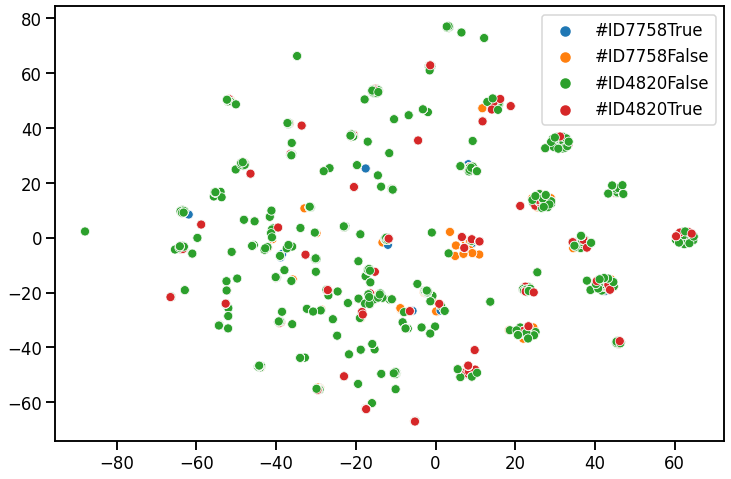

In [175]:
plt.figure(figsize=(12,8))

sns.scatterplot(x=TSNE_fit[:,0], y=TSNE_fit[:,1], hue=(df.id_cliente.astype(str)+df.gostou.astype(str) ))

## Estudando a presença de instrumentos

Heatmap instrumentos pareados

In [30]:
inst=df.loc[:,'Tem_Instr_Violao_Viola':'Tem_Instr_Cordas']

In [31]:
inst=inst.astype(int)

In [32]:
inst=inst.T.dot(inst)

### Matriz de Coocorrencia

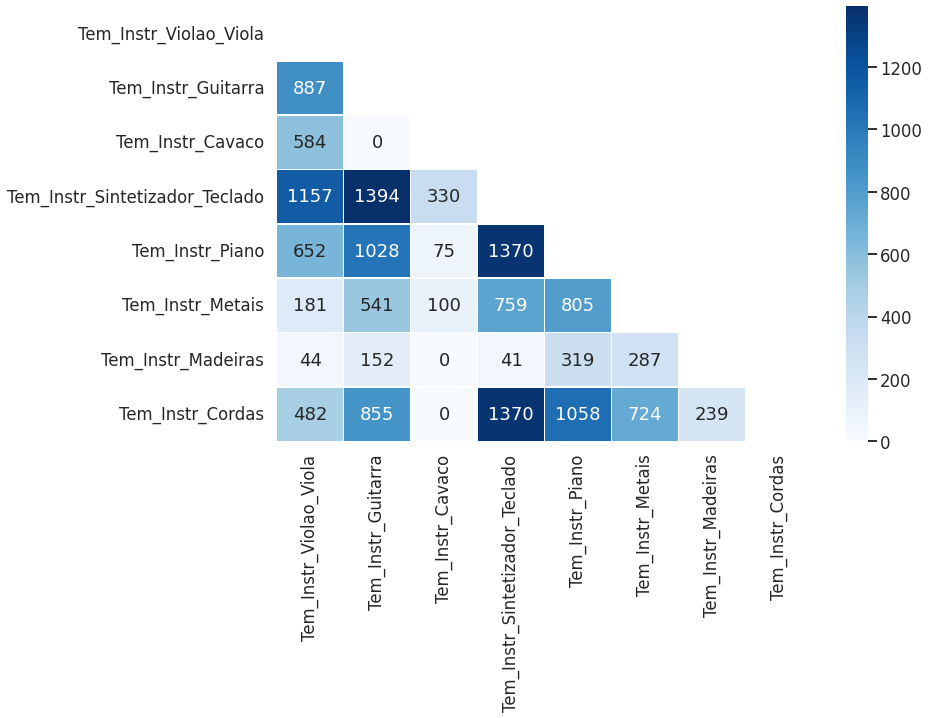

In [33]:
sns.set_context('talk')
mask = np.zeros_like(inst)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 8))
    ax = sns.heatmap(inst, mask=mask,linewidths=.5, annot=True,fmt="d", cmap='Blues')

In [34]:
inst=df.loc[:,'Tem_Instr_Violao_Viola':'Tem_Instr_Cordas']

In [35]:
instcorr=inst.corr()

### Matriz de correlação

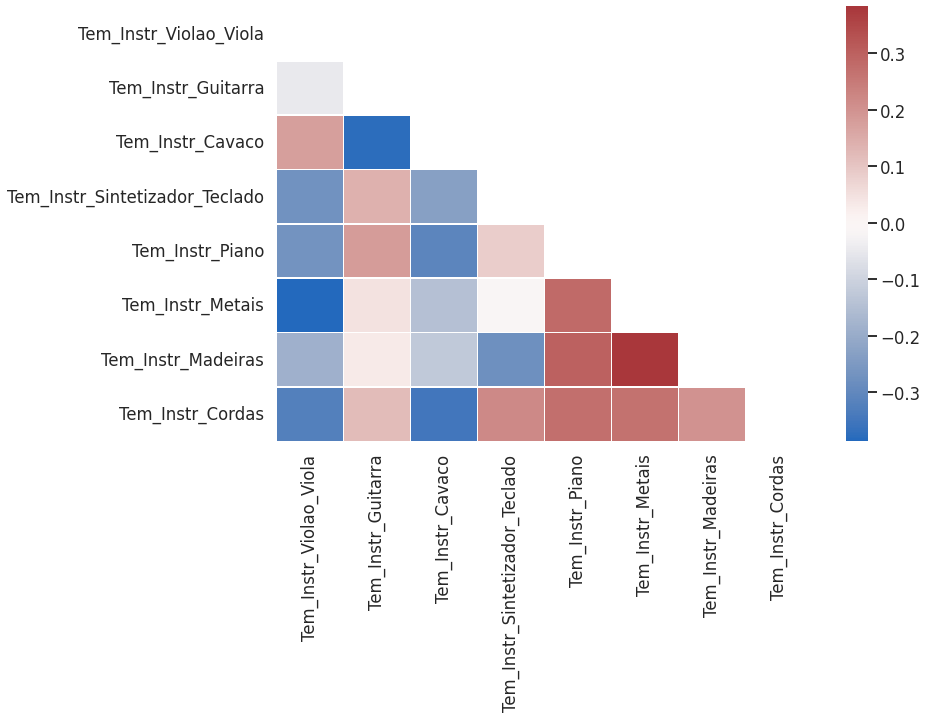

In [36]:
sns.set_context('talk')
mask = np.zeros_like(instcorr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 8))
    ax = sns.heatmap(instcorr, mask=mask,linewidths=.5, cmap='vlag')

## Explorar relação plays x gosto do usuario

1.   Item da lista
2.   Item da lista



Como ponderar o "não gostei mas ouvi muitas vezes" x "gostei mas ouvi pouco"

In [37]:
#cliente1.groupby('gostou')['n_reproducao'].value_counts(bins=4)
playsXgostou = df.groupby('gostou')['n_reproducao'].value_counts()


playsXgostou

gostou  n_reproducao
False   3               966
        2               927
        4               625
        1               483
        5               312
        6               124
        7                43
        8                10
        9                 3
        10                1
True    4               316
        3               301
        5               250
        2               223
        6               152
        7                80
        1                67
        8                29
        9                 7
        10                1
        11                1
Name: n_reproducao, dtype: int64

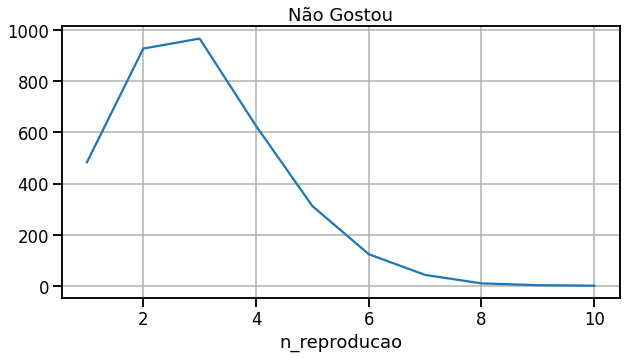

In [38]:
n_gostou = playsXgostou[0].sort_index()

n_gostou.plot(title="Não Gostou", grid=True, figsize=(10, 5))
plt.show()

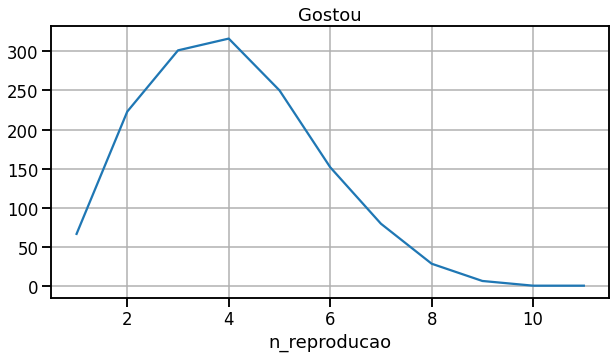

In [39]:
gostou = playsXgostou[1].sort_index()

gostou.plot(title="Gostou", grid=True, figsize=(10, 5))
plt.show()

In [52]:
playsXgostou_n = df.groupby('gostou')['n_reproducao'].value_counts(normalize=True)

In [53]:
playsXgostou_n=playsXgostou_n.reset_index(0)

In [54]:
playsXgostou_n.rename(columns={'n_reproducao':'contagem'}, inplace=True)
playsXgostou_n=playsXgostou_n.reset_index()

In [55]:
playsXgostou_n.head()

,n_reproducao,gostou,contagem
0,3,False,0.276474
1,2,False,0.265312
2,4,False,0.178878
3,1,False,0.138237
4,5,False,0.089296


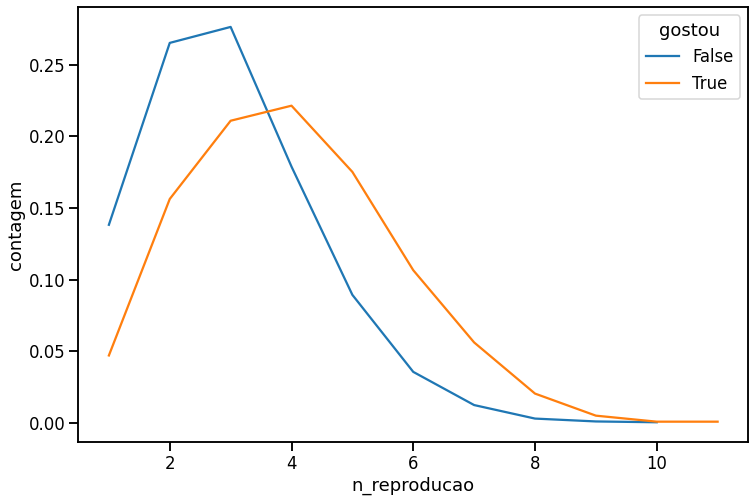

In [61]:
plt.figure(figsize=(12,8))
sns.set_context('talk')
sns.lineplot(data=playsXgostou_n, x="n_reproducao",y='contagem', hue='gostou')

In [ ]:
gostou.median()

80.0

In [ ]:
cliente1.columns

Index(['bateria', 'Tem_Instr_Violao_Viola', 'Tem_Instr_Guitarra',
       'Tem_Instr_Cavaco', 'Tem_Instr_Sintetizador_Teclado', 'Tem_Instr_Piano',
       'Tem_Instr_Metais', 'Tem_Instr_Madeiras', 'Tem_Instr_Cordas', 'BPM',
       'VolMedio', 'PctCantada', 'PctRap', 'duracao', 'ano_lancamento',
       'aovivo', 'modo', 'explicita', 'gostou', 'n_reproducao', 'id_cliente'],
      dtype='object')

## Gosto baseado no ano de lançamento

n de músicas que gostou em x ano / n de músicas daquele ano contidas na base

Transformação dados de ano de lançamento por decada



In [62]:
#cliente1.groupby('ano_lancamento')['gostou'].value_counts(bins=4)
df.groupby('ano_lancamento')['gostou'].value_counts(bins=4)

ano_lancamento                  
1920            (0.9995, 1.0]         1
                (1.0005, 1.001]       0
                (1.0, 1.0005]         0
                (0.9989, 0.9995]      0
1921            (-0.0005, 0.0]        1
                                   ... 
2020            (0.25, 0.5]           0
2021            (-0.002, 0.25]      392
                (0.75, 1.0]         153
                (0.5, 0.75]           0
                (0.25, 0.5]           0
Name: gostou, Length: 384, dtype: int64

In [63]:
#cliente1.groupby('ano_lancamento')['n_reproducao'].value_counts(bins=4)
df.groupby('ano_lancamento')['n_reproducao'].value_counts(bins=4)

ano_lancamento                            
1920            (5.997, 6.0]                    1
                (6.003, 6.006]                  0
                (6.0, 6.003]                    0
                (5.992999999999999, 5.997]      0
1921            (0.9995, 1.0]                   1
                                             ... 
2020            (5.5, 7.0]                     27
2021            (0.99, 3.25]                  343
                (3.25, 5.5]                   156
                (5.5, 7.75]                    40
                (7.75, 10.0]                    6
Name: n_reproducao, Length: 384, dtype: int64

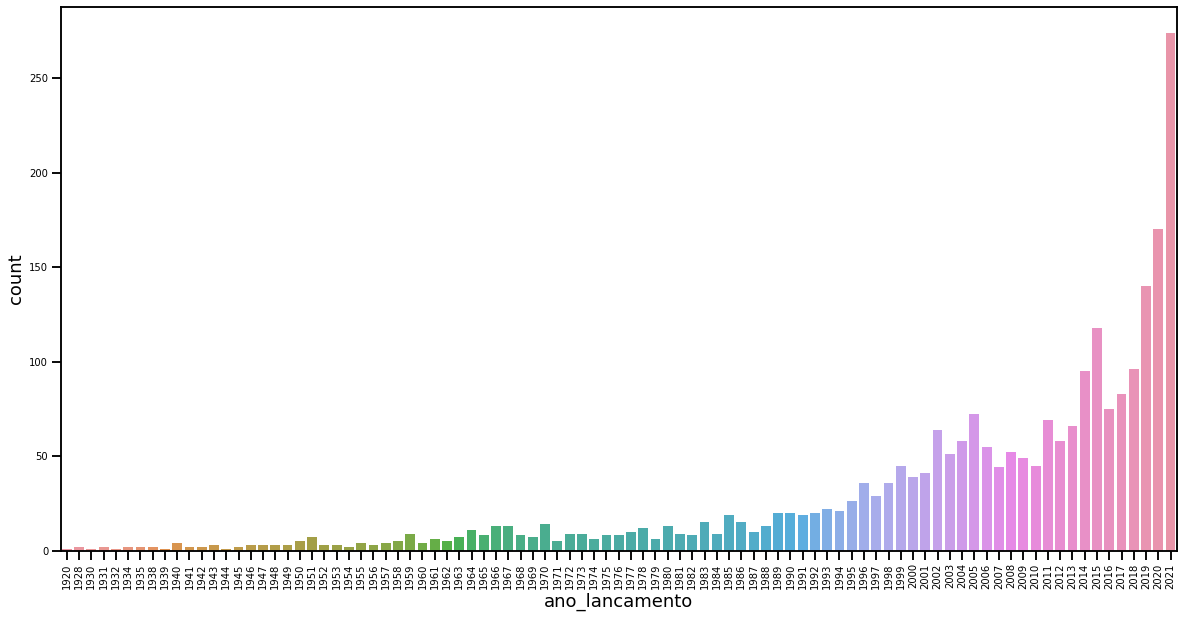

In [64]:
plt.figure(0, figsize=(20,10))
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
# sns.countplot(data=cliente1, x='ano_lancamento')
sns.countplot(data=cliente1, x='ano_lancamento')

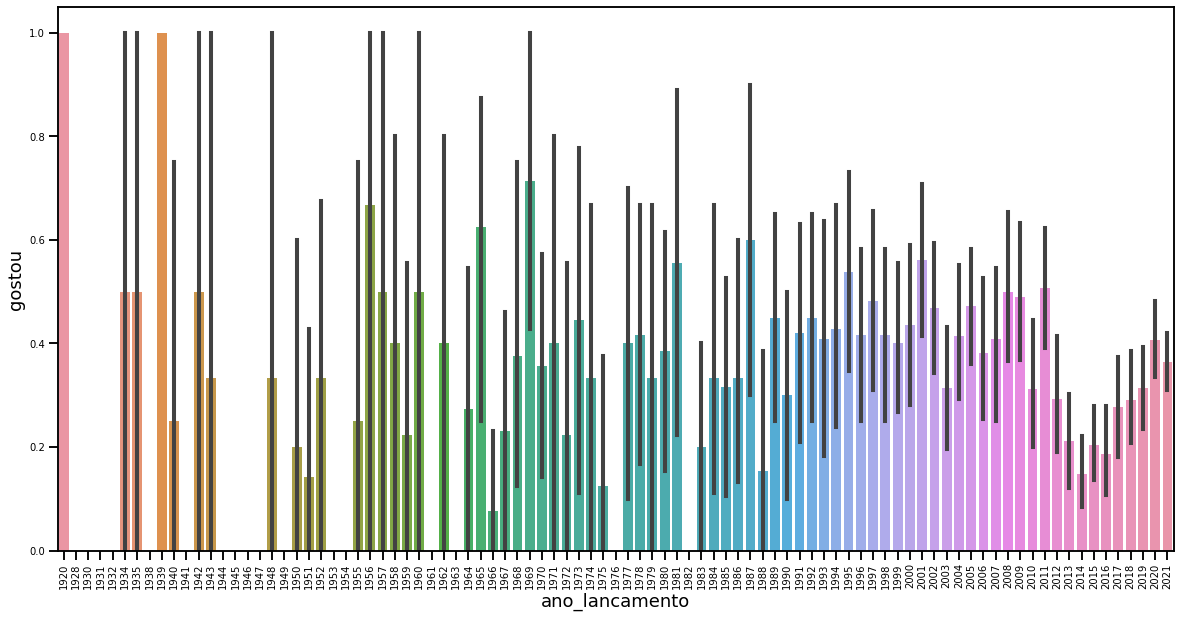

In [65]:
plt.figure(0, figsize=(20,10))
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
#sns.barplot(y='gostou', x='ano_lancamento', data=cliente1)
sns.barplot(y='gostou', x='ano_lancamento', data=cliente1)

Sem a incerteza temos:

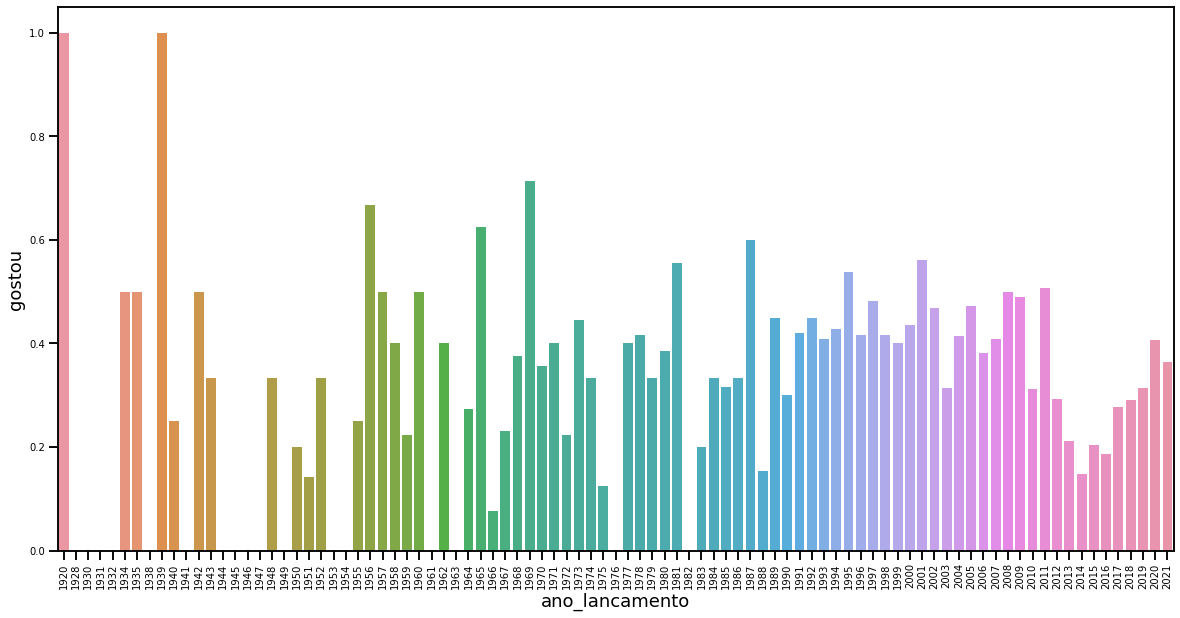

In [66]:
n_info = cliente1.groupby('ano_lancamento', as_index=False)['gostou'].mean()
plt.figure(0, figsize=(20,10))
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
sns.barplot(y='gostou', x='ano_lancamento', data=n_info)

Para o n de reproduções, temos:

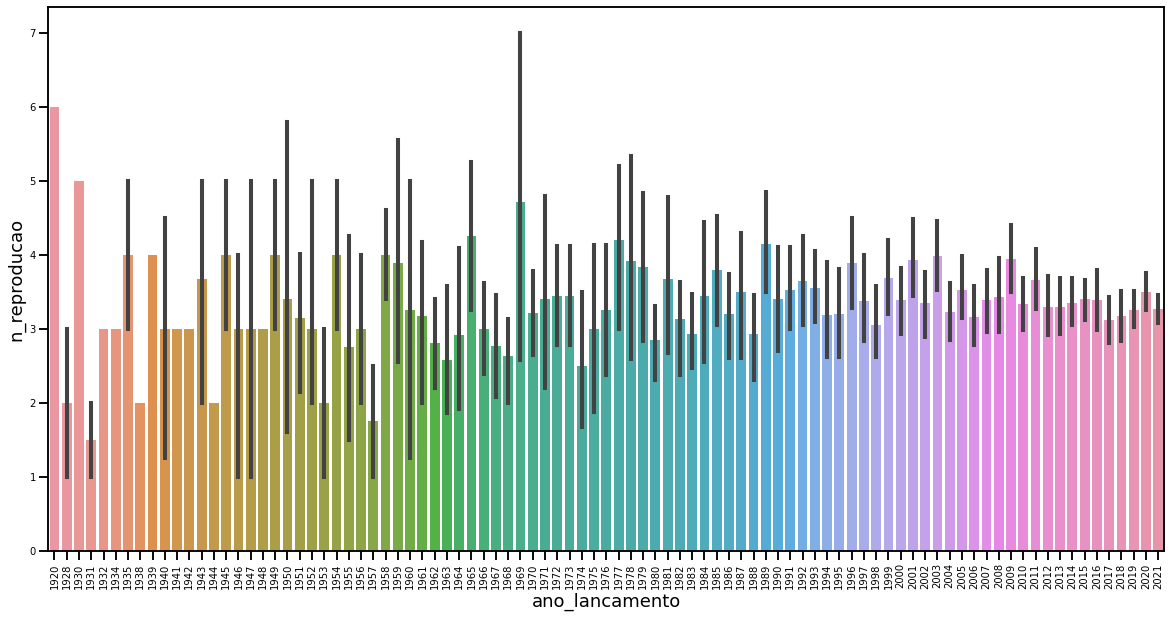

In [ ]:
plt.figure(0, figsize=(20,10))
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
sns.barplot(y='n_reproducao', x='ano_lancamento', data=cliente1)

In [ ]:
cliente1['ano_lancamento'].value_counts()

2021    274
2020    170
2019    140
2015    118
2018     96
       ... 
1930      1
1939      1
1932      1
1944      1
1920      1
Name: ano_lancamento, Length: 91, dtype: int64

In [ ]:
cliente1['ano_lancamento']/max(cliente1['ano_lancamento'].value_counts())

0       7.313869
1       7.295620
2       7.306569
3       7.266423
4       7.364964
          ...   
2470    7.361314
2471    7.354015
2472    7.375912
2473    7.335766
2474    7.321168
Name: ano_lancamento, Length: 2473, dtype: float64

In [ ]:
n_info_total = cliente1.groupby('ano_lancamento', as_index=False)['gostou','n_reproducao'].mean()
n_info_total['quantidade'] = cliente1.groupby('ano_lancamento', as_index=False)['gostou'].count()['gostou']
n_info_total.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,ano_lancamento,gostou,n_reproducao,quantidade
0,1920,1.0,6.0,1
1,1928,0.0,2.0,2
2,1930,0.0,5.0,1
3,1931,0.0,1.5,2
4,1932,0.0,3.0,1


Fator de aceitação médio de ano com peso de quantidade de músicas

In [ ]:
n_info_total['FA_medio_peso'] = n_info_total['gostou']*n_info_total['n_reproducao']*(n_info_total['quantidade']/max(n_info_total['quantidade']))
n_info_total

,ano_lancamento,gostou,n_reproducao,quantidade,FA_medio_peso
0,1920,1.000000,6.000000,1,0.021898
1,1928,0.000000,2.000000,2,0.000000
2,1930,0.000000,5.000000,1,0.000000
3,1931,0.000000,1.500000,2,0.000000
4,1932,0.000000,3.000000,1,0.000000
...,...,...,...,...,...
86,2017,0.277108,3.120482,83,0.261938
87,2018,0.291667,3.166667,96,0.323601
88,2019,0.314286,3.257143,140,0.523045
89,2020,0.405882,3.500000,170,0.881387


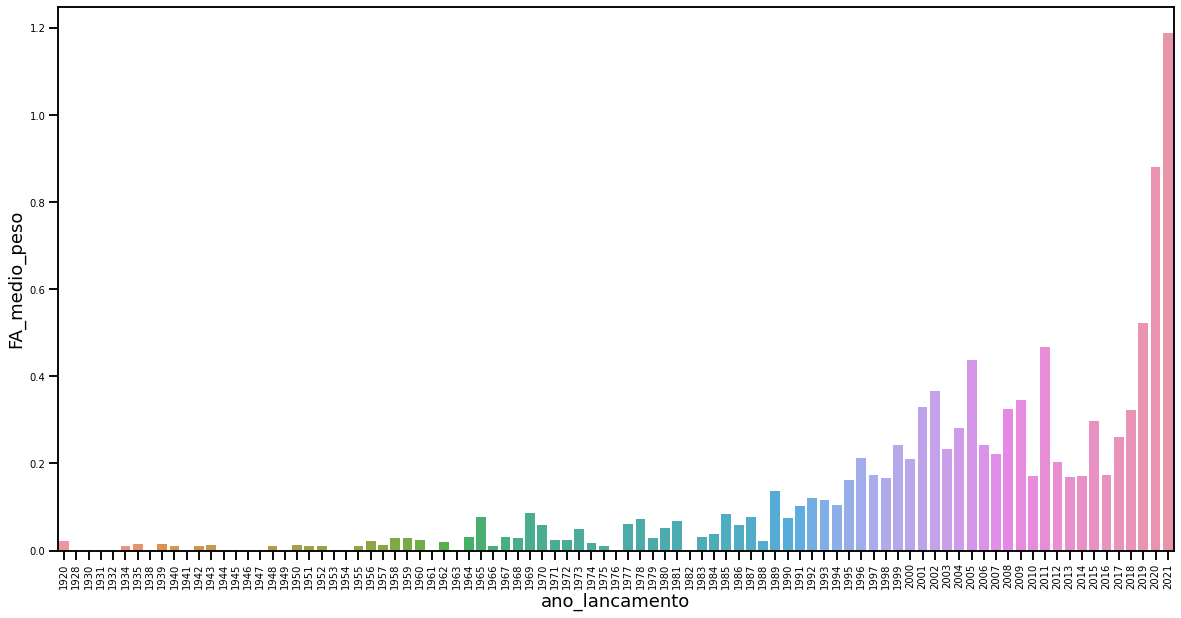

In [ ]:
plt.figure(0, figsize=(20,10))
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
sns.barplot(y='FA_medio_peso', x='ano_lancamento', data=n_info_total)

Fator de aceitação de uma música:

In [ ]:
cliente1['FA_musica'] = cliente1['gostou']*(cliente1['n_reproducao']/max(cliente1['n_reproducao']))
cliente1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,bateria,Tem_Instr_Violao_Viola,Tem_Instr_Guitarra,Tem_Instr_Cavaco,Tem_Instr_Sintetizador_Teclado,Tem_Instr_Piano,Tem_Instr_Metais,Tem_Instr_Madeiras,Tem_Instr_Cordas,BPM,VolMedio,PctCantada,PctRap,duracao,ano_lancamento,aovivo,modo,explicita,gostou,n_reproducao,id_cliente,FA_musica
0,Eletrônica,True,True,False,True,True,False,False,True,110.275495,-6.322162,72.909014,16.308793,233021,2004,False,A#,True,True,2,#ID7758,0.222222
1,Acústica,False,True,False,True,False,False,False,False,117.367073,-6.509007,72.654133,0.000000,166437,1999,False,E,True,True,8,#ID7758,0.888889
2,Acústica,True,False,True,False,False,False,False,False,100.134208,-12.717853,74.129557,0.000000,159426,2002,False,c,False,False,5,#ID7758,0.000000
3,Eletrônica,True,False,False,True,True,False,False,True,105.056053,-8.088894,78.123907,18.818652,244636,1991,False,g,False,False,2,#ID7758,0.000000
4,Acústica,False,False,True,True,False,False,False,False,95.707941,-7.564842,74.159074,0.000000,166520,2018,False,d#,False,True,7,#ID7758,0.777778


In [ ]:
cliente1['FA_musica'].value_counts()

0.000000    1612
0.444444     190
0.333333     166
0.555556     155
0.222222     131
0.666667      99
0.777778      51
0.111111      46
0.888889      18
1.000000       5
Name: FA_musica, dtype: int64

In [ ]:
cliente1['FA_musica'].mean()

0.15640023363436212

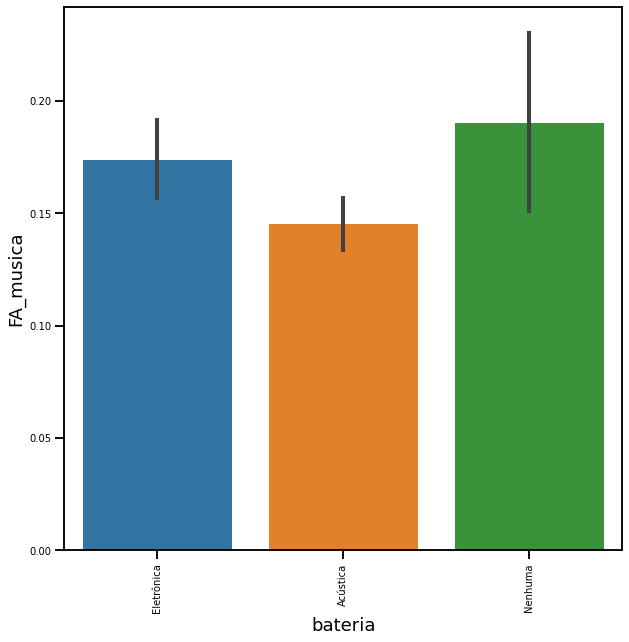

In [ ]:
plt.figure(0, figsize=(10,10))
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
sns.barplot(y='FA_musica', x='bateria', data=cliente1)

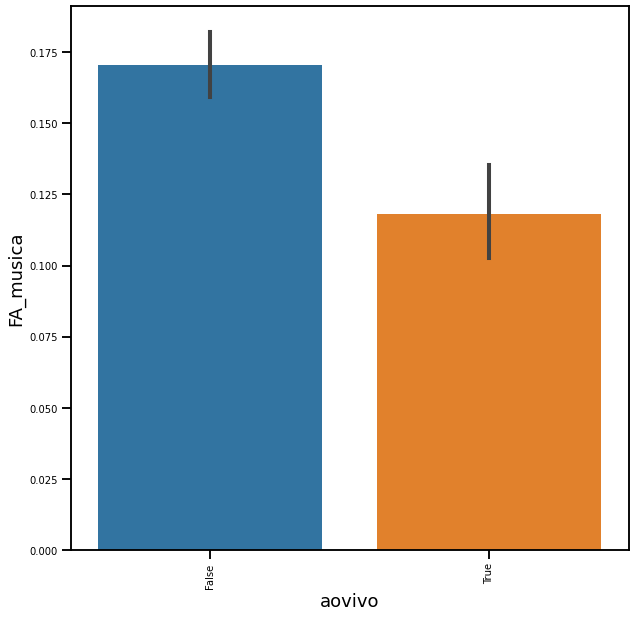

In [ ]:
plt.figure(0, figsize=(10,10))
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
sns.barplot(y='FA_musica', x='aovivo', data=cliente1)

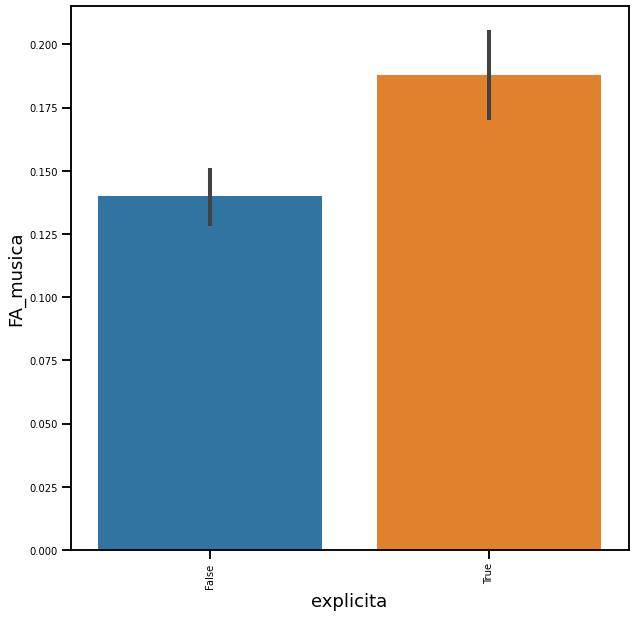

In [ ]:
plt.figure(0, figsize=(10,10))
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
sns.barplot(y='FA_musica', x='explicita', data=cliente1)

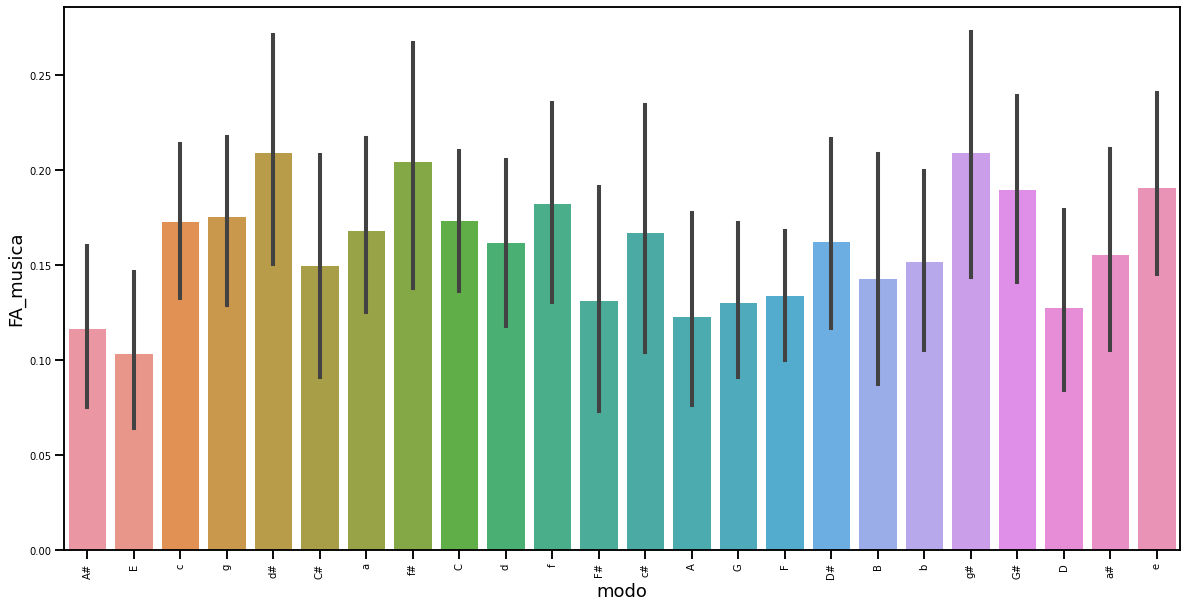

In [ ]:
plt.figure(0, figsize=(20,10))
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
sns.barplot(y='FA_musica', x='modo', data=cliente1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


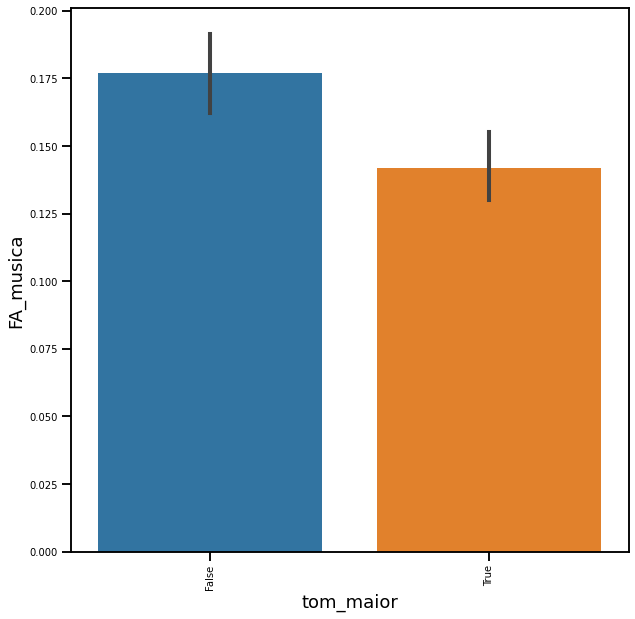

In [ ]:
cliente1['tom_maior'] = cliente1['modo'].str.strip('#').str.isupper()
plt.figure(0, figsize=(10,10))
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
sns.barplot(y='FA_musica', x='tom_maior', data=cliente1)